In [4]:
import pandas as pd
from glob import glob
import itertools
from collections import Counter
import numpy as np
import numpy
import math
import matplotlib.pylab as plt
import os
import matplotlib.cm as cm

In [2]:
# seperate the date-files into user-files
# files=glob('./date/*')

# column_list = 'user_id,access_mode_id,logic_area_name,lac,ci,longtitude,latitude,busi_name,busi_type_name,\
# app_name,app_type_name,start_time,up_pack,down_pack,up_flow,down_flow,site_name,site_channel,cont_app_id,\
# cont_classify_id,cont_type_id,acce_url'.split(',')

# for i in files:
#     data=pd.read_csv(i,names=column_list,usecols=['user_id','start_time','site_name','cont_app_id'])    
#     users=data['user_id'].drop_duplicates()
#     groups=data.groupby('user_id')
    
#     for user in users:
#         df=groups.get_group(user)
#         with open('./siteexample/allusers/' + str(user) +'.csv', 'a+') as f:
#             df.to_csv(f,header=False)

In [2]:
# choose users with terminal and fees records
columns = 'user_id，sex，age，occupation_name，education_name，user_opentime，brand_name，call_duration_m，gprs_flow，\
call_fee，gprs_fee，databusiness_fee，order_name，brand_chn，model_chn，screensize，operation_sys，terminal_price，\
dept_county_name，dept_name'.split('，')

basename=pd.read_csv('./basename.csv', encoding='gbk', names=columns)

basename_except=basename.drop(['order_name'],axis=1)
basename_except=basename_except.drop_duplicates()

basename_except['sex']=basename_except['sex'].replace('不详',np.nan)

basename_except['age']=basename_except['age'].replace(0,np.nan)

basename_except['terminal_price']=basename_except['terminal_price'].replace(0,np.nan)

basename_except['fees']=basename_except['call_fee']+basename_except['gprs_fee']+basename_except['databusiness_fee']

basename_except=basename_except[['user_id','sex','age','fees','brand_chn','terminal_price']]

basename_except=basename_except.dropna(axis=0,how='any')

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
basename_except['brand_chn']=basename_except['brand_chn'].replace('苹果','Apple')

basename_except['brand_chn']=basename_except['brand_chn'].replace('三星','Samsung')
basename_except['brand_chn']=basename_except['brand_chn'].replace('联想','Lenovo')
basename_except['brand_chn']=basename_except['brand_chn'].replace('小米','MI')
basename_except['brand_chn']=basename_except['brand_chn'].replace('华为','Huawei')
basename_except['brand_chn']=basename_except['brand_chn'].replace('酷派','Coolpad')
basename_except['brand_chn']=basename_except['brand_chn'].replace('索尼','Sony')
basename_except['brand_chn']=basename_except['brand_chn'].replace('摩托罗拉','MOTO')

basename_except['brand_chn']=basename_except['brand_chn'].replace('诺基亚','Nokia')
x=basename_except['brand_chn'].values
basename_except['brand_chn']=basename_except['brand_chn'].replace([x for x not in ['Apple','Samsung','Lenovo','MI','Huawei','Coolpad','Sony','MOTO','Nokia']],'Others')


basename_except['sex']=basename_except['sex'].replace('男','Male')
basename_except['sex']=basename_except['sex'].replace('女','Female')

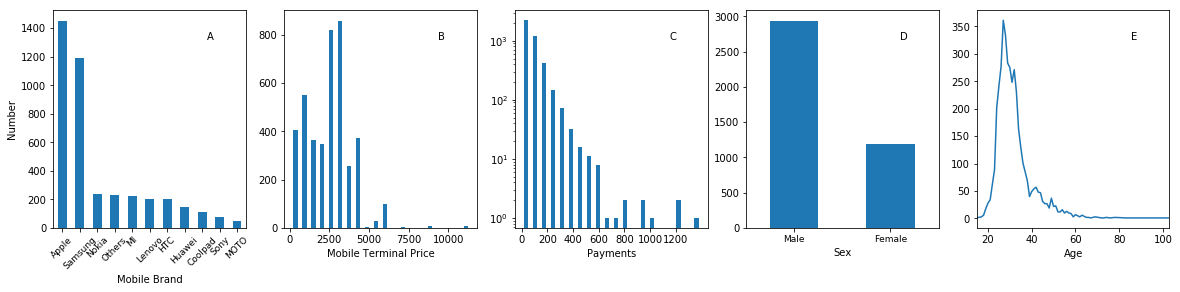

In [27]:
fig=plt.figure(figsize=(20,4),facecolor='white') 
cmap = cm.get_cmap('Accent',5)

ax=fig.add_subplot(1,5,1)
counts=basename_except['brand_chn'].value_counts()
counts.plot.bar(rot=False)

plt.xticks(rotation=45,fontsize=9)
plt.xlabel('Mobile Brand')
plt.ylabel('Number')
ax.text(0.8, 0.9,'A',horizontalalignment='left',verticalalignment='top',transform=ax.transAxes)
# plt.show()

ax=fig.add_subplot(1,5,2)
plt.hist(basename_except['terminal_price'].values,bins=20,rwidth=0.5)
plt.xlabel('Mobile Terminal Price')
# plt.show()
# plt.tight_layout()
ax.text(0.8, 0.9,'B',horizontalalignment='left',verticalalignment='top',transform=ax.transAxes)

ax=fig.add_subplot(1,5,3)
plt.hist(basename_except['fees'].values,bins=20,rwidth=0.5,log=True)
plt.xticks(range(0,1400,200))
plt.xlabel('Payments')
ax.text(0.8, 0.9,'C',horizontalalignment='left',verticalalignment='top',transform=ax.transAxes)

ax=fig.add_subplot(1,5,4)
counts=basename_except['sex'].value_counts()
counts.plot.bar()
plt.xticks(rotation=0,fontsize=9)
plt.xlabel('Sex')
ax.text(0.8, 0.9,'D',horizontalalignment='left',verticalalignment='top',transform=ax.transAxes)

ax=fig.add_subplot(1,5,5)
counts1=basename_except['age'].value_counts()
counts1=counts1.sort_index()
plt.xlabel('Age')
counts1.plot()
ax.text(0.8, 0.9,'E',horizontalalignment='left',verticalalignment='top',transform=ax.transAxes)
plt.savefig('/Users/xuhuimin/Downloads/DistributionSocialClass')
plt.show()

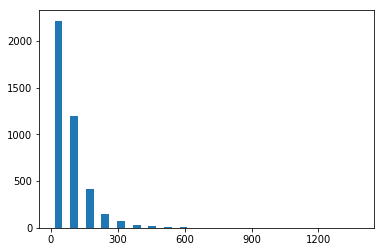

In [24]:
plt.hist(basename_except['fees'].values,bins=20,rwidth=0.5)
plt.xticks(range(0,1400,300))
plt.show()

In [50]:
users=basename_except['user_id'].unique()

In [51]:
# len(users)

4125

In [50]:
# first put all the unique nodes together, second all pair combinations together,third pair combinations for every user
for user in users:
    f='./siteexample/allusers/'+str(user)+'.csv'
    if os.path.isfile(f)==True:
        
        userdata=pd.read_csv(f,names=['user_id','start_time','site_name','cont_app_id'])
        userdata['site']=userdata['site_name']+userdata['cont_app_id']
        userdata=userdata[['user_id','site','cont_app_id']]
        userdata=userdata[userdata['cont_app_id']!='其它']
        userdata=userdata.dropna(axis=0,how='any')
        userdata=userdata.drop_duplicates()

        userdata.to_csv('./siteexample/node.csv',header=False,mode='a+')

        site_list=userdata['cont_app_id'].values
        pair=list(itertools.combinations(site_list,2))
        data=pd.DataFrame(pair)
        data.to_csv('./siteexample/pair.csv',header=False,mode='a+')

        with open('./siteexample/pair/' + str(user) +'.csv', 'a+') as f:
            data.to_csv(f,header=False)

KeyboardInterrupt: 

In [48]:
# userdata=pd.read_csv('./siteexample/allusers/1201099.csv',names=['user_id','start_time','site_name','cont_app_id'])

In [49]:
# userdata['site']=userdata['site_name']+userdata['cont_app_id']

In [50]:
# userdata=userdata[['user_id','site','cont_app_id']]

In [51]:
# userdata=userdata[userdata['cont_app_id']!='其它']

In [52]:
# userdata=userdata.drop_duplicates()

In [53]:
# userdata

,user_id,site,cont_app_id
11176136,1201099,移动梦网服务类,服务类
3524449,1201099,腾讯网即时聊天类,即时聊天类
9233003,1201099,腾讯图片服务即时聊天类,即时聊天类
10766035,1201099,360手机助手应用软件类,应用软件类


In [54]:
# site_list=userdata['cont_app_id'].values
# pair=list(itertools.combinations(site_list,2))
# data=pd.DataFrame(pair)

In [55]:
# data

,0,1
0,服务类,即时聊天类
1,服务类,即时聊天类
2,服务类,应用软件类
3,即时聊天类,即时聊天类
4,即时聊天类,应用软件类
5,即时聊天类,应用软件类


In [58]:
# observed values
site_obs=pd.read_csv('./siteexample/pair.csv',names=['node1','node2'],index_col=0)
site_obs['pair']=site_obs['node1'].astype('str')+' '+site_obs['node2'].astype('str')
counterdict=Counter(site_obs['pair'].values)
counterdict=pd.DataFrame(list(counterdict.items()),columns=['pair','site_obs'])
counterdict.to_csv('./siteexample/observed_value.csv')

In [60]:
# expected values
for i in range (10): # reconstruct random network for 10 times
    name='site_exp'+str(i)
    name=pd.read_csv('./siteexample/node.csv',index_col=0,names=['user_id','site','cont_app_id'])# read data
    numpy.random.shuffle(name['cont_app_id'].values) # shuffle the data
    users=name['user_id'].drop_duplicates()
    groups=name.groupby('user_id')
    
    path='./siteexample/expected_value/'
    f=path+'site_exp'+str(i)+'.csv'

    for user in users:
        userdata=groups.get_group(user)
        userdata=userdata.drop_duplicates()

        site_list=userdata['cont_app_id'].values
        pair=list(itertools.combinations(site_list,2))
        site_exp=pd.DataFrame(pair)
        site_exp.to_csv(f,header=0,mode='a+')

    site_exp=pd.read_csv(f,names=['node1','node2'])   
    site_exp['pair']=site_exp['node1'].astype('str')+' '+site_exp['node2'].astype('str')
    counterdict=Counter(site_exp['pair'].values)
    counterdict=pd.DataFrame(list(counterdict.items()),columns=['pair','site_obs'])
    counterdict.to_csv(f,header=0,mode='w')

In [61]:
# combine observed value and expected value
files=glob('./siteexample/expected_value/*')

for f in files:
    name=f.split('/')[-1].split('.')[0]
    data=pd.read_csv(f,names=['pair','count'])
    diction=dict(data[['pair','count']].values)
    z_score=pd.read_csv('./siteexample/observed_value.csv',index_col=0)
    z_score[name]=z_score['pair'].apply(lambda x: diction[x]
                                                    if x in diction
                                                    else numpy.nan)
    z_score.to_csv('./siteexample/observed_value.csv')

In [62]:
# z_score
z_score=pd.read_csv('./siteexample/observed_value.csv',index_col=0)
z_score=z_score.fillna(0)
mean=z_score.iloc[:,[x for x in range(2,12)]].mean(axis=1)
std=z_score.iloc[:,[x for x in range(2,12)]].std(axis=1)
z_score['z_score']=(z_score['site_obs']-mean)/std
z_score.to_csv('./siteexample/observed_value.csv')

In [63]:
# put z_score into every user-file
z_score=pd.read_csv('./siteexample/observed_value.csv',usecols=['pair','z_score'])
diction=dict(z_score.values)

files=glob('./siteexample/pair/*')

for f in files:
    data=pd.read_csv(f,names=['node1','node2'])
    data['pair']=data['node1'].astype('str')+' '+data['node2'].astype('str')
    data['z_score']=data['pair'].apply(lambda x: diction[x]
                                  if x in diction
                                   else np.nan)
    data.to_csv(f)

In [64]:
# four categories group by z_score
files=glob('./siteexample/pair/*')
lista=[]
listb=[]
listc=[]
for f in files:
    data=pd.read_csv(f)
    if len(data['z_score'])>0:
        user_id=f.split('/')[-1].split('.')[0]
        lista.append(user_id)
        a=numpy.array(data['z_score'].values)
        median=numpy.median(a)
        listb.append(median)
        pertentile_10=numpy.percentile(a,10)
        listc.append(pertentile_10)
df=pd.DataFrame([lista,listb,listc]).T
df.columns=['user_id','median','pertentile_10']
df.to_csv('./siteexample/zscore_category.csv')

In [65]:
# add category

df=pd.read_csv('./siteexample/zscore_category.csv',index_col=0)
df=df[~df.isin([numpy.nan, numpy.inf, -numpy.inf]).any(1)]

high_low=df[(df['median']>df['median'].median())&(df['pertentile_10']>0)].index
df.ix[high_low,'category']='high_low'


low_low=df[(df['median']<=df['median'].median())&(df['pertentile_10']>0)].index
df.ix[low_low,'category']='low_low'

low_high=df[(df['median']<=df['median'].median())&(df['pertentile_10']<=0)].index
df.ix[low_high,'category']='low_high'

high_high=df[(df['median']>df['median'].median())&(df['pertentile_10']<=0)].index
df.ix[high_high,'category']='high_high'

df=df[['user_id','median','pertentile_10','category']]
df.to_csv('./siteexample/zscore_category.csv')

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


In [47]:
# fetch the valid information sex age fees brand terminal_price to zscore_category

df=pd.read_csv('./siteexample/zscore_category.csv',index_col=0)

names=['terminal_price','fees']
for n in names:
    diction=dict(basename[['user_id',n]].values)
    df[n]=df['user_id'].apply(lambda x: diction[x]
                                 if x in diction
                                 else numpy.nan)
    
# diction=dict(basename[['user_id','fees']].values)
# df['fees']=df['user_id'].apply(lambda x: diction[x]
#                              if x in diction
#                              else numpy.nan)

df.to_csv('./siteexample/zscore_category.csv')

FileNotFoundError: File b'./siteexample/zscore_category.csv' does not exist